# Contacts Analysis #

In [9]:
import MDAnalysis
import MDAnalysis.analysis.distances
from MDAnalysis import transformations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from pathlib import Path
import utils_mda.seq_manipulation as seq_manipulation
from importlib import reload
reload(seq_manipulation)

from MDAnalysis.analysis import leaflet
plt.style.use('default')


In [10]:
def get_combinations(u, peptide, pep_num, pairs=None):
    """
    Get list of residue residue combinations

    Input: 
        peptide: list of strin
            list of peptides
        pepnum: int 
            number of peptides of each type
        pairs: 
    """
    _, new_dict = seq_manipulation.get_aa_sequence(u, peptide, pep_num)
    peptide_ranges = seq_manipulation.get_peptide_range(peptide, list(new_dict.keys())[0], pep_num)
    
    comb_list = []
    for i in peptide_ranges.keys():
        for j in peptide_ranges.keys():
            comb_list.extend([(x, y) for x in peptide_ranges[i] for y in peptide_ranges[j] if (y, x) not in comb_list])
    if pairs:
        comb_list.extend([(x, y) for x in peptide_ranges[i] for y in peptide_ranges[j] if (y, x) not in comb_list])
    return list(set(comb_list))

p="/Volumes/miru_backup/jade_2synergy/popg_replicas/WF1a_WF2_pg_2"
# p=f"/Volumes/miru_backup/jade_2synergy/popg/{pep}_pg"
# p = f"/Volumes/miru_backup/synergy_in_membrane/popg/{pep}_pg"
u = seq_manipulation.get_universe(p, "md_0_1_combined", "md_0_1")
workflow = [transformations.unwrap(u.atoms)]
u.trajectory.add_transformations(*workflow)
x = get_combinations(u, [l for l in "WF1a_WF2".split("_")], 4)

FOUND xtc
found U
peptides_list is  ['WF1a', 'WF1a', 'WF1a', 'WF1a', 'WF2', 'WF2', 'WF2', 'WF2']
peptides_list is  ['WF1a', 'WF1a', 'WF1a', 'WF1a', 'WF2', 'WF2', 'WF2', 'WF2']


In [18]:
def distance_matrix_time(u, peptide, pep_num):
    print("pep num is ", pep_num)
    # seq_manipulation.check_peptides(u, peptide)
    step_size = 500
    start, stop, step = u.trajectory.check_slice_indices(None, None, None)


    frames = np.arange(start, stop, step_size)

    n_frames = frames.size

    #works same as nested loop
    mindist_matrix_all_peptide = {}
    combinations = get_combinations(u, peptide, pep_num)
    
    new_mindist = {
        f"{c[0]}:{c[1]}":[] for c in combinations
    }
    df_list = []
    for frame_index, ts in tqdm(enumerate(u.trajectory[frames]), total=n_frames):
        new_matrix = []
        #Loop through permutations, create 2D array with amino acid and minimum distance
        mindist_matrix_all_peptide["peptide"] = []
        for c in combinations:
            selection1 = u.select_atoms('resid %s'%c[0]).positions
            selection2 = u.select_atoms('resid %s'%c[1]).positions
            dist = MDAnalysis.analysis.distances.distance_array(selection1, selection2, 
                                                                box=u.dimensions, result=None, backend='serial')
            min_dist = np.min(dist)
            new_mindist[f"{c[0]}:{c[1]}"].append(min_dist)
            new_matrix.append((c[0], c[1], min_dist, u.trajectory.time/1000))
        # new_matrix = [[int(k.split(":")[0]), int(k.split(":")[1]), v, ts] for k,v in new_mindist.items()]
        df = pd.DataFrame(new_matrix, columns=['Peptide1','Peptide2', 'mindist', "Time(ns)"])

        df_list.append(df)
    return df_list
membrane = "pg"
for pep in ["WF1a_WF2"]:
    p="/Volumes/miru_backup/jade_2synergy/popg/WF1a_WF2_pg"

    u = seq_manipulation.get_universe(p, "md_0_1_combined", "md_0_1")
    workflow = [transformations.unwrap(u.atoms)]
    u.trajectory.add_transformations(*workflow)
    df_list = distance_matrix_time(u, [l for l in pep.split("_")], 4)

FOUND xtc
found U
pep num is  4
peptides_list is  ['WF1a', 'WF1a', 'WF1a', 'WF1a', 'WF2', 'WF2', 'WF2', 'WF2']
peptides_list is  ['WF1a', 'WF1a', 'WF1a', 'WF1a', 'WF2', 'WF2', 'WF2', 'WF2']


100%|██████████| 101/101 [1:00:30<00:00, 35.95s/it]


In [22]:
pd_concat

,Peptide1,Peptide2,mindist,Time(ns)
0,13,88,16.740623,0.0
1,32,101,45.795023,0.0
2,44,155,50.891442,0.0
3,16,93,18.814652,0.0
4,35,106,17.252727,0.0
...,...,...,...,...
18245,83,147,39.838906,1000.0
18246,102,160,43.446561,1000.0
18247,14,47,50.094651,1000.0
18248,41,150,39.770506,1000.0


In [23]:
u = seq_manipulation.get_universe(p, "md_0_1_combined", "md_0_1")
pep_num_dict, seq_dict = seq_manipulation.get_aa_sequence(u, ["WF1a", "WF2"], 4)
def get_pep(res_id):
    return [k for k, v in pep_num_dict.items() if res_id in v][0]
pd_concat["Peptide1"] = pd_concat["Peptide1"].apply(lambda x: get_pep(x))
pd_concat["Peptide2"] = pd_concat["Peptide2"].apply(lambda x: get_pep(x))
pd_concat

FOUND xtc
found U
peptides_list is  ['WF1a', 'WF1a', 'WF1a', 'WF1a', 'WF2', 'WF2', 'WF2', 'WF2']


,Peptide1,Peptide2,mindist,Time(ns)
0,pep1,pep5,16.740623,0.0
1,pep2,pep5,45.795023,0.0
2,pep3,pep7,50.891442,0.0
3,pep1,pep5,18.814652,0.0
4,pep2,pep6,17.252727,0.0
...,...,...,...,...
18245,pep5,pep7,39.838906,1000.0
18246,pep5,pep8,43.446561,1000.0
18247,pep1,pep3,50.094651,1000.0
18248,pep3,pep7,39.770506,1000.0


In [39]:
peptide_list = list(set(pd_concat["Peptide1"]))
from itertools import combinations
combinations_list = list(set(combinations(peptide_list, 2)))
combinations_list = [f"{p[0]}_{p[1]}" for p in combinations_list]
combinations_list
len(combinations_list)

28

In [46]:
def get_peptide_pair(row):
    peptide_pair = row["Peptide1"] + "_" + row["Peptide2"]
    if peptide_pair in combinations_list:
        return peptide_pair
    else:
        return row["Peptide2"] + "_" + row["Peptide1"]

In [69]:
df_interactions = pd_concat
df_interactions["Peptide_Pair"] = df_interactions.apply(lambda row: get_peptide_pair(row), axis=1)
# df_interactions = df_interactions[df_interactions["Peptide_Pair"].isin(combinations_list)]
# df_interactions = df_interactions.groupby(["Peptide_Pair", "Time(ns)"])["mindist"].min().unstack(-1)
# df_interactions = df_interactions.mask(df_interactions>7, 8)
df_interactions["mindist"] = df_interactions["mindist"].apply(pd.to_numeric)
df_interactions

,Peptide1,Peptide2,mindist,Time(ns),Peptide_Pair
0,pep1,pep5,16.740623,0.0,pep1_pep5
1,pep2,pep5,45.795023,0.0,pep5_pep2
2,pep3,pep7,50.891442,0.0,pep7_pep3
3,pep1,pep5,18.814652,0.0,pep1_pep5
4,pep2,pep6,17.252727,0.0,pep6_pep2
...,...,...,...,...,...
18245,pep5,pep7,39.838906,1000.0,pep5_pep7
18246,pep5,pep8,43.446561,1000.0,pep8_pep5
18247,pep1,pep3,50.094651,1000.0,pep1_pep3
18248,pep3,pep7,39.770506,1000.0,pep7_pep3


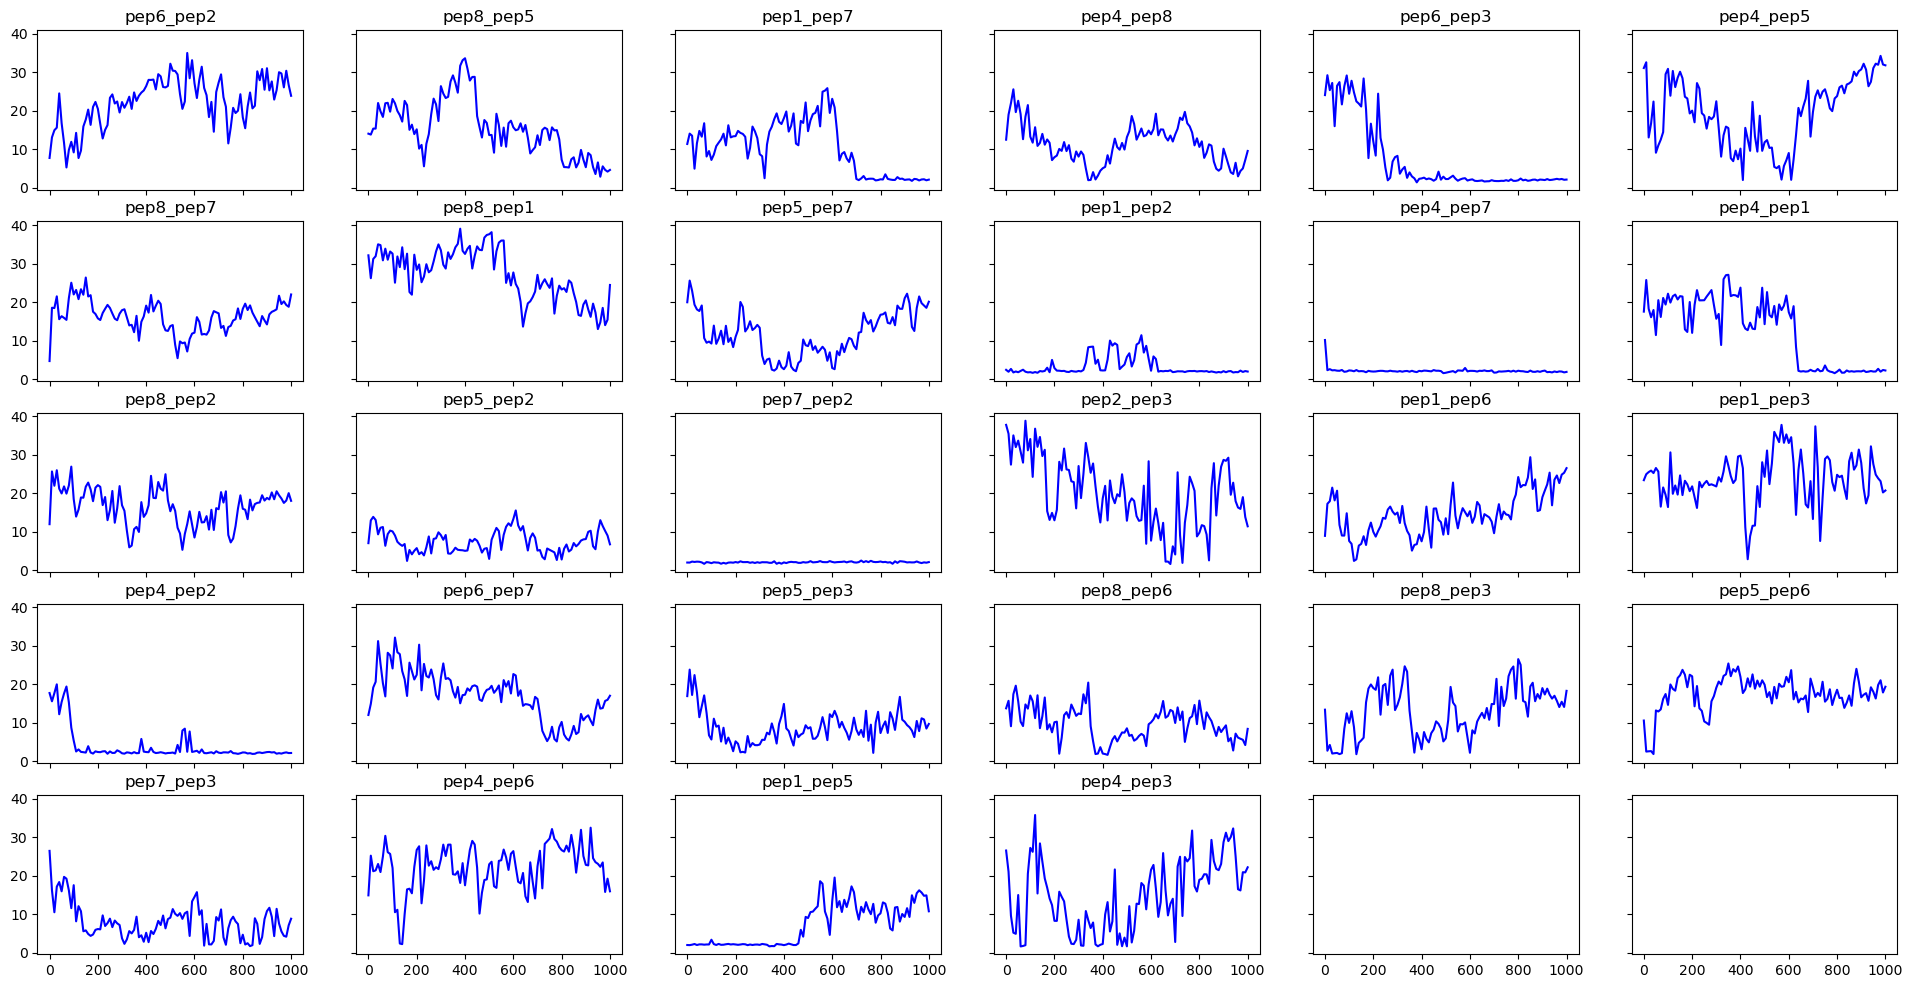

In [48]:
from itertools import combinations

fig, axs = plt.subplots(5, 6, figsize=(24, 12), sharey=True, sharex=True)

for pep_pair, ax in zip(combinations_list, axs.ravel()):
    pd_in_contact = df_interactions[df_interactions["Peptide_Pair"]==pep_pair]
    df3 = pd_in_contact.groupby(["Peptide_Pair", "Time(ns)"])["mindist"].min().unstack(-1)
    ax.plot(df3.T, c='b')
    ax.set_title(f"{pep_pair}")
plt.savefig("WF1a_WF2_contacts_min_distance_popg")


In [70]:
df_true_or_false = df_interactions[~df_interactions["Peptide_Pair"].isin([
    "pep1_pep1", "pep2_pep2", "pep3_pep3", "pep4_pep4", "pep5_pep5", "pep6_pep6", "pep7_pep7", "pep8_pep8"])]
df_true_or_false = df_true_or_false.groupby(["Peptide_Pair", "Time(ns)"])["mindist"].min().unstack(-1)
df_true_or_false


Time(ns),0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,...,910.0,920.0,930.0,940.0,950.0,960.0,970.0,980.0,990.0,1000.0
Peptide_Pair,,,,,,,,,,,,,,,,,,,,,
pep1_pep2,2.385774,1.889906,2.628661,1.710807,1.960724,1.764280,2.102452,2.417472,1.896256,1.724903,...,1.764020,2.011292,2.064479,1.699234,1.806956,1.773305,2.183461,1.838317,2.066375,1.941886
pep1_pep3,23.378086,24.927498,25.485246,25.869884,25.224259,26.538378,25.617474,16.507112,21.495015,19.569153,...,21.261743,17.333816,19.426018,32.167125,27.570567,24.827267,23.859645,23.110560,20.196680,20.694081
pep1_pep5,1.956406,1.926289,2.043359,2.216865,1.958083,2.117762,2.121151,2.043673,2.096282,2.099026,...,11.523592,9.239390,14.873626,12.899950,15.410218,16.161297,15.584562,14.736947,14.855842,10.715117
pep1_pep6,8.917772,17.245746,17.924544,21.450778,18.127160,20.639861,11.767114,9.006536,8.984653,14.787096,...,20.662415,22.284098,25.337123,16.853089,23.500208,24.599748,22.627296,24.815920,25.297658,26.505001
pep1_pep7,11.397329,14.088482,13.537213,4.979028,11.580910,14.790065,13.290888,16.781685,8.137061,9.560570,...,2.156283,2.196603,1.814858,2.325635,2.235939,1.923056,2.178280,2.229015,1.965431,2.135218
pep2_pep3,37.744598,35.444620,27.416230,35.014090,31.966191,33.650582,30.818403,27.938844,38.817821,31.132456,...,28.402213,29.215974,19.596670,22.725720,17.933763,16.279481,15.923897,18.971835,13.806183,11.401301
pep4_pep1,17.504858,25.718340,18.246517,16.050048,17.924672,11.413946,20.480425,16.119460,21.056017,19.338825,...,2.210725,1.823555,1.921144,2.079878,1.942597,1.951535,2.650141,1.902156,2.347366,2.220357
pep4_pep2,17.747828,15.603870,17.724459,20.012883,12.239004,15.417495,17.625006,19.441618,15.294504,8.758459,...,2.446960,2.313024,2.390105,1.995395,2.132232,2.019356,2.219034,2.331645,2.159491,2.178187
pep4_pep3,26.496638,20.995438,9.556993,5.160718,4.868224,14.938729,1.584724,1.711724,1.915121,20.462599,...,31.130298,28.942688,30.002729,32.240718,25.018419,16.441164,16.134448,20.865791,20.811993,22.135432


In [74]:
df_true_or_false = df_true_or_false.mask(df_true_or_false>7, 0)
df_interactions_to_save = df_true_or_false.mask(df_true_or_false>0, 1)
df_interactions_to_save.to_csv("WF1a_WF2_interactions_true_false.csv")
df_interactions_to_save

Time(ns),0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,...,910.0,920.0,930.0,940.0,950.0,960.0,970.0,980.0,990.0,1000.0
Peptide_Pair,,,,,,,,,,,,,,,,,,,,,
pep1_pep2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
pep1_pep3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pep1_pep5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pep1_pep6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pep1_pep7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
pep2_pep3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pep4_pep1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
pep4_pep2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
pep4_pep3,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_interactions_to_save

Time(ns),0.0,20.0,40.0,60.0,80.0,100.0,120.0,140.0,160.0,180.0,...,820.0,840.0,860.0,880.0,900.0,920.0,940.0,960.0,980.0,1000.0
Peptide_Pair,,,,,,,,,,,,,,,,,,,,,
pep1_pep6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pep2_pep1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pep2_pep3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pep2_pep4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pep2_pep5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pep2_pep6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pep2_pep7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pep2_pep8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pep3_pep1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
